# About Dataset

## 📔Author : Syed Muzamil Karim
 [![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=flat&logo=github)](https://github.com/mozammilkarim)\
 [![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=flat&logo=kaggle)](https://www.kaggle.com/muzammlkarim)\
 [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=flat&logo=linkedin)](https://www.linkedin.com/in/mozammilkarim/)

## Metadata 📄
    Google PlayStore Android App Data. (2.3 Million+ App Data)
Dataset link : <https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps>

    The dataset contains Application data of more than 600K applications with the following 23 attributes.-

+ App Name : Name of the application

+ App Id: Unique Application Id

+ Category: Category of application to which it belongs

+ Rating : Average rating  given to the application by a user

+ Rating count : Number of rating for the application

+ Installs :Approximate install count

+ Minimum Installs :Approximate minimum app install count

+ Maximum Installs : Approximate maximum app install count

+ Free : Whether app is Free or Paid

+ Price: App price

+ Currency

+ Size

+ Minimum
 Android
+ Developer
 Id
+ Developer
 Website
+ Developer
 Email
+ Released

+ Privacy
 Policy
+ Last
 Updated
+ Content
 Rating
+ Ad
 Supported
+ In
 app purchases
+ Editor
 Choice

## Aim/Objectives
We intend to conduct an Exploratory Data Analysis (EDA) on the given dataset. The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of data cleaning and normalization. During the Wrangling process, we will document our observations. Ultimately, we will produce a summary and draw insights from our findings.

# Importing all libraries

In [423]:
# load dataset from kaggle url
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !ls

In [424]:
df=pd.read_csv("Amazon-Products.csv")

In [425]:
df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [426]:
df.describe()

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


Unnamed is id of product, renaming it

In [427]:
df.rename(columns={"Unnamed: 0":"product_id"},inplace=True)

In [428]:
df.sample(3)

,product_id,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
256492,1429,VNQ® Ac Remote Compatible with O General Ac (M...,"tv, audio & cameras",Home Entertainment Systems,https://m.media-amazon.com/images/I/31oLK0x8HU...,https://www.amazon.in/Compatible-General-Whats...,4.0,225,₹499,₹999
344521,4666,FZN 12 Volt Inverter Battery Hydrometer Specif...,appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/11dPDxgjAk...,https://www.amazon.in/FZN-Inverter-Hydrometer-...,4.1,9,₹300,₹500
68913,8553,Lanyard Wrist Strap for Cell Phone Cases Keys ...,"tv, audio & cameras",Camera Accessories,https://m.media-amazon.com/images/I/51DoPRp+EI...,https://www.amazon.in/WristIDTM-Wrist-Strap-Ad...,3.3,7,₹312,₹599


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   product_id      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


### ratings , no_of_ratings, discount_price and actual_price has missing values.   

ratings , no_of_ratings, discount_price and actual_price are integer or decimal value columns but are stored as object type in pandas dataframe.
We need to convert them to proper data types.

In [430]:
df['discount_price'].unique()

array(['₹32,999', '₹46,490', '₹34,490', ..., '₹3,712.10', '₹1,429.60',
       '₹651.01'], dtype=object)

',' and ₹ need to be removed to make it decimal data type .

In [431]:
df['no_of_ratings'].dtypes

dtype('O')

In [432]:
df['no_of_ratings'].unique()

array(['2,255', '2,948', '1,206', ..., '3,329', '7,141', '4,406'],
      dtype=object)

no_of_ratings column has ',' which is causing it to become object type

Convert no_of _ratings into  float type

In [433]:
df['no_of_ratings']=df['no_of_ratings'].apply(lambda x: x.replace(',','') if "," in str(x) else x)

In [434]:
# df['no_of_ratings']=df['no_of_ratings'].astype(float)
# some error ocurred

In [435]:
df.groupby(["no_of_ratings"])["no_of_ratings"].value_counts().tail(25)

no_of_ratings
9984                                                3
9985                                                1
9986                                                3
999                                                 9
9995                                                1
FREE Delivery by Amazon                          3296
Only 1 left in stock.                            1050
Only 2 left in stock.                             562
Only 3 left in stock.                              34
Only 4 left in stock.                              22
Only 5 left in stock.                              29
This item will be released on August 14 2023.       1
Usually dispatched in 1 to 2 months.                1
Usually dispatched in 11 to 12 days.               17
Usually dispatched in 2 to 3 days.                  6
Usually dispatched in 2 to 3 weeks.                 8
Usually dispatched in 3 to 4 weeks.               847
Usually dispatched in 3 to 5 days.                  3
Usually dispat

There are some records which have wrong data in no_of_ratings column, so imputing them with nan values

In [436]:
wrong_strings_list=['FREE Delivery by Amazon','Only 1 left in stock.','Only 2 left in stock.',
                    'Only 3 left in stock.','Usually dispatched in 2 to 3 days.','Usually dispatched in 3 to 4 weeks.',
                    'Usually dispatched in 4 to 5 days.','Usually dispatched in 4 to 5 weeks.','Usually dispatched in 5 to 6 days.'
                    ,'Usually dispatched in 6 to 7 days.','Usually dispatched in 7 to 8 days.','Only 4 left in stock.'
                    ,'Only 5 left in stock.','Usually dispatched in 11 to 12 days.','Usually dispatched in 3 to 5 days.'
                    ,'Usually dispatched in 9 to 10 days.','Usually dispatched in 2 to 3 weeks.','Usually dispatched in 8 to 9 days.'
                    ,'Usually dispatched in 1 to 2 months.','This item will be released on August 14 2023.']

In [437]:
# replacing each wrong string to null values
for i in wrong_strings_list:
  df.loc[df['no_of_ratings']==i, 'no_of_ratings'] = np.nan


In [438]:
df['no_of_ratings']=df['no_of_ratings'].astype(float)

For ratings column

In [439]:
df.groupby(["ratings"])["ratings"].value_counts().tail(15)

ratings
4.4       13809
4.5       12618
4.6        8348
4.7        5365
4.8        2343
4.9         521
5.0       32875
FREE       1357
Get        4852
₹100          1
₹2.99         2
₹65           1
₹68.99        1
₹70           5
₹99          14
Name: count, dtype: int64

In [440]:
wrong_strings_list=['FREE','Get','₹100'
                    ,'₹2.99','₹65','₹68.99'
                    ,'₹70','₹99'
                    ]

# replacing each wrong string to null values
for i in wrong_strings_list:
  df.loc[df['ratings']==i, 'ratings'] = np.nan


In [441]:
df['ratings']=df['ratings'].astype(float)

For discount price and actual price

In [442]:
df["discount_price"].value_counts()

discount_price
₹499       18248
₹299       15337
₹399       14510
₹999       13000
₹599       11760
           ...  
₹19,286        1
₹14,683        1
₹21,343        1
₹23,771        1
₹651.01        1
Name: count, Length: 27511, dtype: int64

In [443]:
df["discount_price"]=df["discount_price"].apply(lambda x: x.replace("₹","") if "₹" in str(x)  else x)
df["discount_price"]=df["discount_price"].apply(lambda x: x.replace(",","") if "," in str(x)  else x)
df["discount_price"]=df["discount_price"].astype(float)

In [444]:
df['discount_price'].value_counts()

discount_price
499.00      18248
299.00      15337
399.00      14510
999.00      13000
599.00      11760
            ...  
19286.00        1
14683.00        1
21343.00        1
23771.00        1
651.01          1
Name: count, Length: 27511, dtype: int64

Repeating the same preprocessing For actual price column

In [445]:
df["actual_price"].value_counts()

actual_price
₹999         48774
₹1,999       25795
₹1,499       18809
₹499         14406
₹1,299       14068
             ...  
₹59,421          1
₹52,072          1
₹52,767          1
₹32,877          1
₹8,023.60        1
Name: count, Length: 23170, dtype: int64

In [446]:
df["actual_price"]=df["actual_price"].apply(lambda x: x.replace("₹","") if "₹" in str(x)  else x)
df["actual_price"]=df["actual_price"].apply(lambda x: x.replace(",","") if "," in str(x)  else x)
df["actual_price"]=df["actual_price"].astype(float)

In [447]:
df.describe()

,product_id,ratings,no_of_ratings,discount_price,actual_price
count,551585.000000,369558.000000,369558.000000,4.904220e+05,5.337720e+05
mean,7006.200471,3.832311,840.778698,2.623161e+03,2.311128e+04
std,5740.835523,0.756102,8651.536018,9.458196e+03,1.355082e+07
min,0.000000,1.000000,1.000000,8.000000e+00,0.000000e+00
25%,1550.000000,3.500000,4.000000,3.890000e+02,9.900000e+02
50%,5933.000000,3.900000,20.000000,6.790000e+02,1.599000e+03
75%,11482.000000,4.300000,133.000000,1.399000e+03,2.999000e+03
max,19199.000000,5.000000,589547.000000,1.249990e+06,9.900000e+09


In [448]:
# df.query('(ratings == "FREE") | (ratings == "GET") |  (ratings == "₹68.99") ' ).sample(5)

Now Imputing missing values in all columns, but before that dropping image and link column as we don't need them for our analysis

In [449]:
df.drop(columns=['image','link'],axis=1,inplace=True)

In [450]:
df.isnull().sum().sort_values(ascending=False)

ratings           182027
no_of_ratings     182027
discount_price     61163
actual_price       17813
product_id             0
name                   0
main_category          0
sub_category           0
dtype: int64

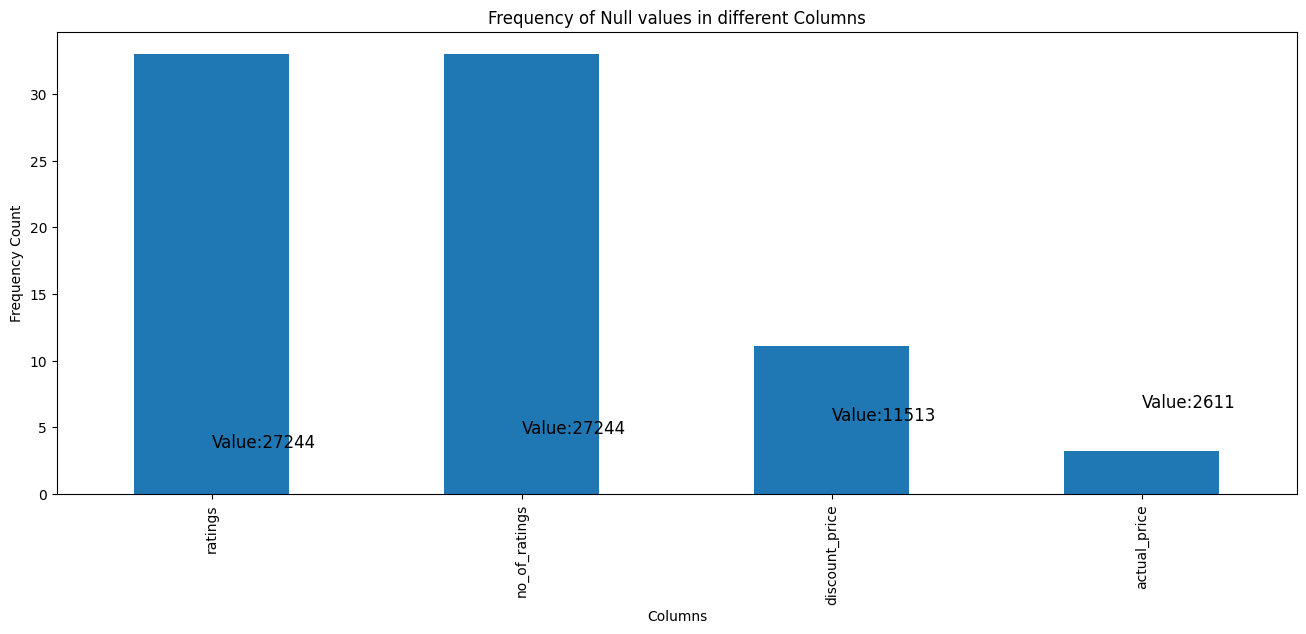

In [451]:
plt.figure(figsize=(16,6))
#plot the null values by their precentage, only if the null values are more than 1%
missing_values=df.isnull().sum().sort_values(ascending=False)/len(df)*100
missing_values=missing_values[missing_values>1].plot(kind='bar')
plt.text(0,3.5,"Value:27244",fontsize=12) # respective null values
plt.text(1,4.5,"Value:27244",fontsize=12)
plt.text(2,5.5,"Value:11513",fontsize=12)
plt.text(3,6.5,"Value:2611",fontsize=12)
plt.title("Frequency of Null values in different Columns")
plt.xlabel("Columns")
plt.ylabel("Frequency Count")
plt.show()

<Axes: >

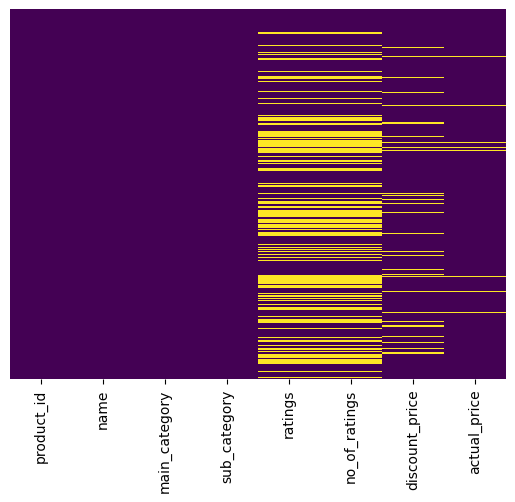

In [452]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

ratings and no_of_ratings have same missing values . Actual price and discount_price also have some missing values that needs to be imputed.

<Axes: xlabel='ratings', ylabel='Density'>

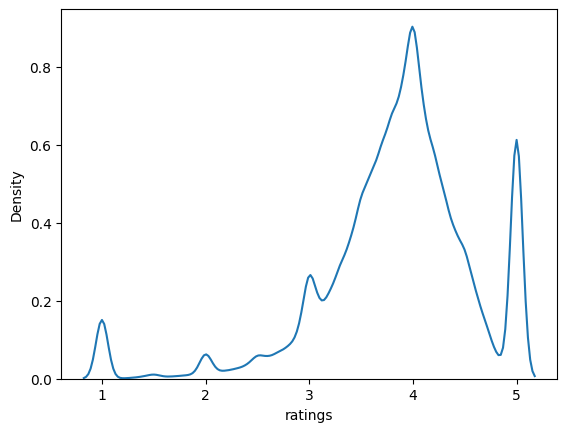

In [453]:
sns.kdeplot(data=df,x='ratings')

<Axes: xlabel='ratings'>

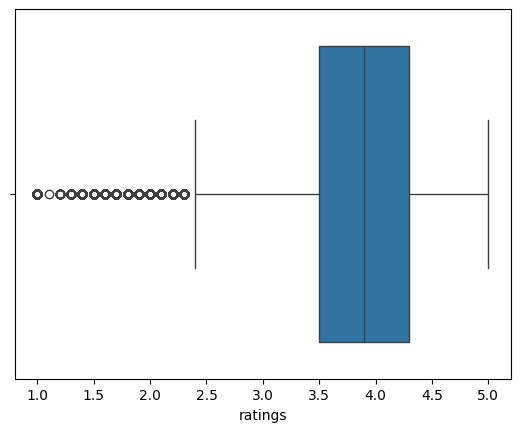

In [454]:
sns.boxplot(data=df,x='ratings')

Ratings has some outliers and is not following normal distribution

In [455]:
df['ratings'].fillna(df['ratings'].median(),inplace=True)

<Axes: xlabel='no_of_ratings'>

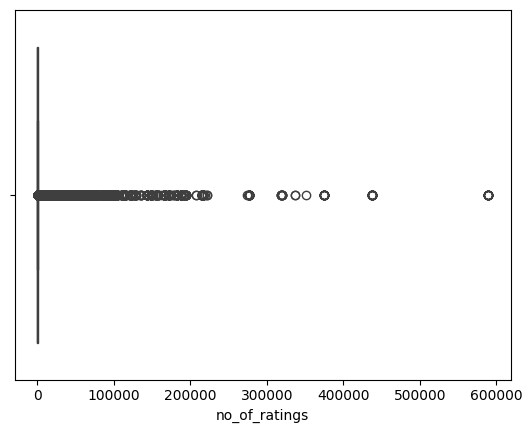

In [456]:
sns.boxplot(data=df,x='no_of_ratings')

Transformation should be done for better understanding

In [457]:
df["log_of_no_of_ratings"]=np.log(df["no_of_ratings"])

<Axes: xlabel='log_of_no_of_ratings'>

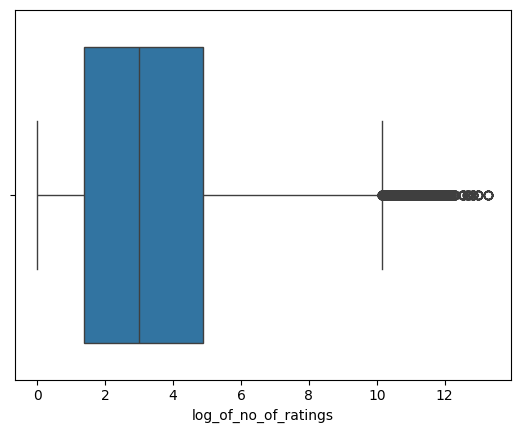

In [458]:
sns.boxplot(data=df,x='log_of_no_of_ratings')

log_of_no_of_ratings has also some outliers, so replacing null values with median. Actually log_of_no_of_ratings is representing no_of_ratings column , so no_of_ratings column's null values can also be imputed using median

In [459]:
df["log_of_no_of_ratings"].fillna(df["log_of_no_of_ratings"].median(),inplace=True)

In [460]:
df["no_of_ratings"].fillna(df["no_of_ratings"].median(),inplace=True)

In [461]:
print("Percentage of missing values in actual price ", (df["actual_price"].isnull().sum()/len(df))*100)

Percentage of missing values in actual price  3.229420669525096


<Axes: xlabel='actual_price'>

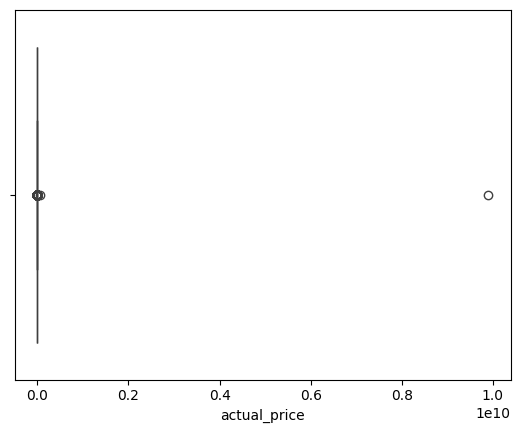

In [462]:
sns.boxplot(data=df,x='actual_price')

Filling missing value in actual_price with median

In [463]:
df["actual_price"].fillna(df["actual_price"].median(),inplace=True)

To fill null values of discount_price, we will use ML algorithm

In [464]:
df.columns

Index(['product_id', 'name', 'main_category', 'sub_category', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price',
       'log_of_no_of_ratings'],
      dtype='object')

<Axes: >

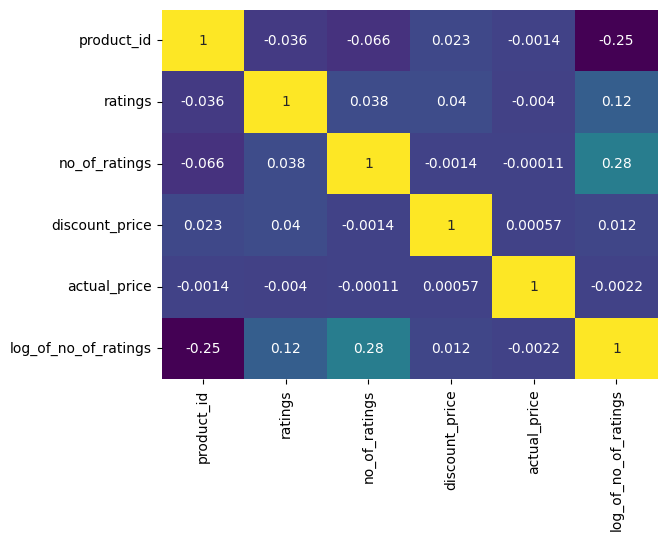

In [465]:
sns.heatmap(df[['product_id', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price',
       'log_of_no_of_ratings']].corr(),yticklabels=True,cbar=False,cmap='viridis',annot=True)

Discount_price is strongly corelated to actual_price

In [466]:
df.duplicated().value_counts()

False    551585
Name: count, dtype: int64

Using Regression technique

In [467]:
df[df['discount_price']>df["actual_price"]].head()

,product_id,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,log_of_no_of_ratings


In [468]:
# # impute missing values with regression imputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # call the IterativeImputer class with max_iter = 10
# imputer = IterativeImputer(max_iter=10,initial_strategy='median',imputation_order='random')

# #impute missing values with regression imputer
# df['discount_price'] = imputer.fit_transform(df[['discount_price']])

# # check the number of missing values in each column
# df.isnull().sum().sort_values(ascending=False)

Checking if imputation entered wrong results

In [469]:
# # impute missing values with KNN imputer
# from sklearn.impute import KNNImputer

# # call the KNN class with number of neighbors = 4
# imputer = KNNImputer(n_neighbors=4)

# #impute missing values with KNN imputer
# df['discount_price'] = imputer.fit_transform(df[['discount_price']])

# # check the number of missing values in each column
# df.isnull().sum().sort_values(ascending=False)

In [470]:
df.groupby(["sub_category"])["discount_price"].median()

sub_category
Air Conditioners                39190.0
All Appliances                    899.0
All Car & Motorbike Products      419.0
All Electronics                   580.5
All Exercise & Fitness            499.0
                                 ...   
Washing Machines                10408.5
Watches                           409.0
Western Wear                      518.0
Women's Fashion                   498.0
Yoga                              699.0
Name: discount_price, Length: 112, dtype: float64

* Each sub_category of product has different discount_price , so imputing missing values as per the category of product

In [481]:
# df['Rating'].median()
median=df.groupby('sub_category')['discount_price'].median()
df['discount_price'] = df.apply(lambda row: median[row['sub_category']] if pd.isna(row['discount_price']) else row['discount_price'], axis=1)

In [422]:
df[df['discount_price']>df["actual_price"]].__len__()/len(df)

0.03155814606996202

Insights time

In [482]:
df.sample(4)

,product_id,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,log_of_no_of_ratings
261793,6730,AMS Mini 2.4Ghz 600Mbps USB WiFi Adapter 802.1...,"tv, audio & cameras",Home Entertainment Systems,3.9,20.0,539.0,1499.0,2.995732
539397,10228,Amazon Brand - Symbol Women Dress,women's clothing,Western Wear,4.0,54.0,663.0,2299.0,3.988984
406775,1112,Spy Mission 720P Wireless Portable Surveillanc...,"tv, audio & cameras",Security Cameras,2.3,5.0,2999.0,3499.0,1.609438
10585,289,"WaveX Matte Bike Maintainer Combo | Wash, Clea...",car & motorbike,All Car & Motorbike Products,4.2,112.0,606.0,1038.0,4.718499


Top 5 Products with the lowest discount price

In [487]:
df.sort_values(by='discount_price').head(5)

,product_id,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,log_of_no_of_ratings
124233,849,"BRU Instant Coffee Sachet,Ground, 8g",grocery & gourmet foods,"Coffee, Tea & Beverages",4.0,7.0,8.0,10.0,1.945910
437600,17,"Kurkure Yummy Cheese Puffcorn Namkeen, 28g",grocery & gourmet foods,Snack Foods,4.4,1485.0,9.0,10.0,7.303170
437916,333,"Cadbury Oreo Original Vanilla Creme Biscuit, 4...",grocery & gourmet foods,Snack Foods,4.4,1353.0,9.0,10.0,7.210080
268602,291,Rin Detergent Bar - 165g,beauty & health,Household Supplies,4.0,44.0,9.0,10.0,3.784190
437604,21,"Lay's Potato Chips 24g/27g, West Indies Hot 'n...",grocery & gourmet foods,Snack Foods,4.3,864.0,9.0,10.0,6.761573


Top 5 Products that are most expensive

In [488]:
df.sort_values(by='discount_price').tail(5)

,product_id,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,log_of_no_of_ratings
310760,185,USPTO 2.85 Carat Real GIA Certifed Diamond Loo...,accessories,Jewellery,3.9,20.0,459999.0,920000.0,2.995732
197464,2588,PC Jeweller 18k (750) Yellow Gold and Solitair...,accessories,Gold & Diamond Jewellery,3.9,20.0,468012.0,550602.0,2.995732
149498,122,Venus Gems Gallery Real Diamond Ring 2 Carat O...,accessories,Fashion & Silver Jewellery,3.9,20.0,499999.0,1000000.0,2.995732
310622,47,Venus Gems Gallery Real Diamond Ring 2 Carat O...,accessories,Jewellery,3.9,20.0,499999.0,1000000.0,2.995732
498818,584,Samsung 214 cm (85 inches) 8K Ultra HD Smart N...,"tv, audio & cameras",Televisions,4.0,10.0,1249990.0,1594900.0,2.302585


In [28]:
df.main_category.value_counts()

main_category
women's clothing           38208
tv, audio & cameras        28800
accessories                27751
men's shoes                19056
appliances                 10296
sports & fitness            7008
car & motorbike             5856
toys & baby products        3528
beauty & health             3120
home & kitchen              2448
stores                      2352
grocery & gourmet foods     2256
kids' fashion               2208
bags & luggage              2064
pet supplies                1632
women's shoes               1392
Name: count, dtype: int64

In [29]:
percentage=(df.main_category.value_counts().head(5).sum())/len(df)*100
percentage

78.56319947333772

Only top 5 main categories cover 77% of all products

In [30]:
df.groupby(["main_category"])["sub_category"].value_counts()

main_category            sub_category                  
accessories              Bags & Luggage                    19152
                         Fashion & Silver Jewellery         8599
appliances               All Appliances                     9576
                         Air Conditioners                    720
bags & luggage           Backpacks                          2064
beauty & health          Beauty & Grooming                  1920
                         Diet & Nutrition                   1200
car & motorbike          Car Accessories                    1392
                         All Car & Motorbike Products       1272
                         Car Parts                          1224
                         Car Electronics                    1008
                         Car & Bike Care                     960
grocery & gourmet foods  Coffee, Tea & Beverages            1296
                         All Grocery & Gourmet Foods         960
home & kitchen           Bedroom L

Each main category has one to two sub categories. Interestingly sports & fitness is a special main category that has 3 sub categories.

False    157976
Name: count, dtype: int64

No duplicate present in our dataset